In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
# 绘制原始信号和滤波后的信号
def plot_filtered_signal(sg, filtered_sg):
    plt.subplot(2, 1, 1)
    plt.plot(sg)
    plt.title("Original Signal")
    plt.subplot(2, 1, 2)
    plt.plot(filtered_sg)
    plt.title("Filtered Signal")
    plt.show()

F:\miniconda3\envs\JupyterLab\lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
C:\Users\65133\AppData\Local\Temp\ipykernel_11716\2345255466.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 20 * np.log10(abs(h)))


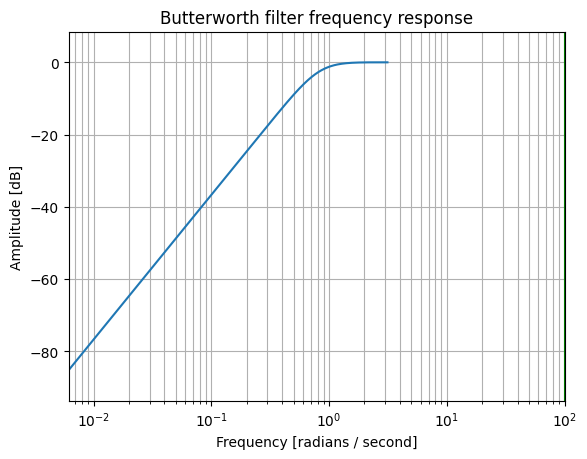

In [3]:
import filter
# 读取MAT文件
mat_contents = sio.loadmat('10.28throat.mat')

# 获取MAT文件中的变量
sg = mat_contents['throat']

# 对信号进行零填充
# 前后各填充了1000个0。这么做是为了保证在进行滤波操作时不会因为信号边缘的影响而产生误差
padlen = 1000  # samples
sg = np.pad(sg, (padlen, padlen), 'constant')

# 高通滤波
fs = 200  # 采样率为200Hz
cutoff = 25  # 截止频率为25Hz
filtered_sg = filter.butter_highpass_filter(sg, cutoff, fs, 5)

# 绘制滤波器
b, a = filter.butter_highpass(cutoff, fs, order=2)
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

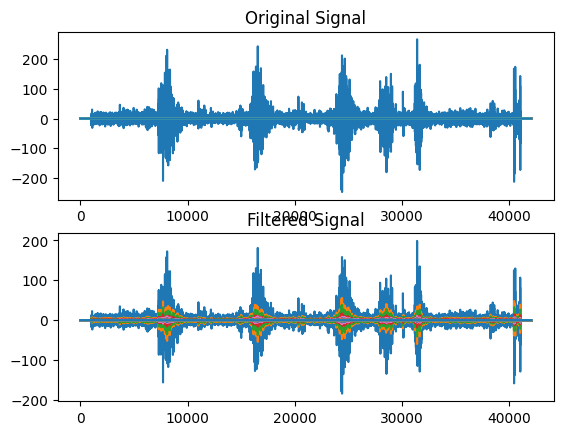

In [4]:
plot_filtered_signal(sg, filtered_sg)

In [5]:
# 谐波滤波
f0 = 50  # 主频为50Hz
num_harmonics = 5  # 滤除前5个谐波
filtered_sg = harmonic_filter(filtered_sg, fs, f0, num_harmonics)

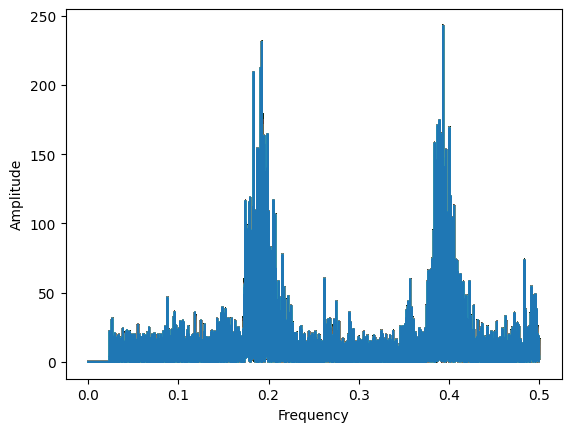

In [6]:
import matplotlib.pyplot as plt
from scipy import fftpack

# 计算信号的傅里叶变换
spectrum = fftpack.fft(sg)

# 取傅里叶变换结果的绝对值并绘制频谱图（只显示正轴）
frequencies = fftpack.fftfreq(len(spectrum))
mask = frequencies > 0
plt.plot(frequencies[mask], abs(spectrum[mask]))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()